Your client is a multi-national financial company, which offers multiple products to the consumers.
There are multiple channels to offer these products to consumers although major contribution is coming 
from offline distribution channel. Offline channel sells Financial products to consumers via their agent
network and as per government regulation these agents must be certified to sell financial products. 
There are multiple certification programs against different categories of financial products. 

As this offline channel shares major contribution to total company sales, company focuses on recruitment and certify 
them to build large agent network. Here, major challenge is training them to get the certifications to sell various 
type of products.

You are given a dataset of trainee performance for the training curriculum test wise within multiple programs.
Your task is to predict the performance on such tests given the demographic information and training program/test details.
This will enable your client to strengthen its training problem by figuring out the most important factors that lead to a 
better engagement and performance for a trainee.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm,skew


In [2]:
train_data=pd.read_csv(r'D:\personal\family\Machine Learning Projects Final\Datasets\Analytic vidya hackathon\train.csv')
test_data=pd.read_csv(r'D:\personal\family\Machine Learning Projects Final\Datasets\Analytic vidya hackathon\test.csv')

In [3]:
train_data.columns

Index(['id', 'program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'is_pass'],
      dtype='object')

In [4]:
train_data.head(10)

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1
5,12531_23,T_3,T,134,23,offline,intermediate,12531,F,High School Diploma,1,29.0,4,N,2.0,0
6,17874_144,Y_2,Y,120,144,online,easy,17874,M,Bachelors,2,48.0,3,N,3.0,1
7,8129_61,U_1,U,134,61,online,easy,8129,M,Matriculation,2,45.0,1,N,1.0,1
8,5652_57,U_1,U,134,57,offline,easy,5652,M,Matriculation,4,NaN,3,N,3.0,1
9,17019_153,Y_1,Y,136,153,offline,hard,17019,M,Bachelors,3,28.0,2,N,4.0,1


In [5]:
test_data.columns

Index(['id', 'program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating'],
      dtype='object')

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         73147 non-null  object 
 1   program_id                 73147 non-null  object 
 2   program_type               73147 non-null  object 
 3   program_duration           73147 non-null  int64  
 4   test_id                    73147 non-null  int64  
 5   test_type                  73147 non-null  object 
 6   difficulty_level           73147 non-null  object 
 7   trainee_id                 73147 non-null  int64  
 8   gender                     73147 non-null  object 
 9   education                  73147 non-null  object 
 10  city_tier                  73147 non-null  int64  
 11  age                        45418 non-null  float64
 12  total_programs_enrolled    73147 non-null  int64  
 13  is_handicapped             73147 non-null  obj

In [7]:
train_data.isnull().sum()

id                               0
program_id                       0
program_type                     0
program_duration                 0
test_id                          0
test_type                        0
difficulty_level                 0
trainee_id                       0
gender                           0
education                        0
city_tier                        0
age                          27729
total_programs_enrolled          0
is_handicapped                   0
trainee_engagement_rating       77
is_pass                          0
dtype: int64

In [8]:
test_data.isnull().sum()

id                               0
program_id                       0
program_type                     0
program_duration                 0
test_id                          0
test_type                        0
difficulty_level                 0
trainee_id                       0
gender                           0
education                        0
city_tier                        0
age                          11791
total_programs_enrolled          0
is_handicapped                   0
trainee_engagement_rating       31
dtype: int64

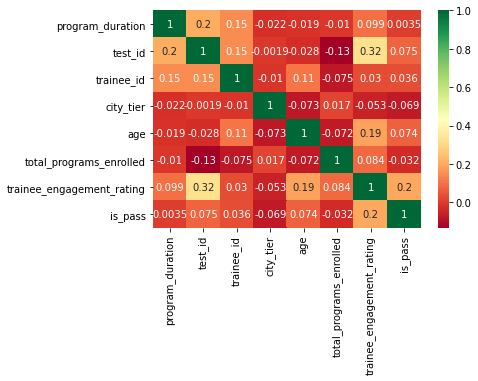

In [9]:
cor_mat=train_data.corr()
features=cor_mat.index

heatmap=sns.heatmap(train_data[features].corr(),annot=True,cmap="RdYlGn")



In [10]:
cor_with_target=cor_mat.sort_values(['is_pass'], ascending=False)
cor_with_target.is_pass

is_pass                      1.000000
trainee_engagement_rating    0.197383
test_id                      0.074568
age                          0.073969
trainee_id                   0.035900
program_duration             0.003545
total_programs_enrolled     -0.031695
city_tier                   -0.068663
Name: is_pass, dtype: float64

In [11]:
print(train_data.shape)
print(test_data.shape)

(73147, 16)
(31349, 15)


In [12]:
all_data=pd.concat([train_data,test_data],axis=0)

In [13]:
all_data.drop(['is_pass'],axis=1,inplace=True)

In [14]:
all_data.isnull().sum()

id                               0
program_id                       0
program_type                     0
program_duration                 0
test_id                          0
test_type                        0
difficulty_level                 0
trainee_id                       0
gender                           0
education                        0
city_tier                        0
age                          39520
total_programs_enrolled          0
is_handicapped                   0
trainee_engagement_rating      108
dtype: int64

In [15]:
all_data.drop(['age'],axis=1,inplace=True)

In [16]:
all_data['trainee_engagement_rating'].describe()

count    104388.000000
mean          2.397776
std           1.327130
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max           5.000000
Name: trainee_engagement_rating, dtype: float64

In [17]:
all_data['trainee_engagement_rating'].value_counts()

1.0    36547
2.0    24636
4.0    18841
3.0    16352
5.0     8012
Name: trainee_engagement_rating, dtype: int64

In [18]:
all_data['trainee_engagement_rating'].fillna(1,inplace=True)

In [19]:
all_data.isnull().sum()

id                           0
program_id                   0
program_type                 0
program_duration             0
test_id                      0
test_type                    0
difficulty_level             0
trainee_id                   0
gender                       0
education                    0
city_tier                    0
total_programs_enrolled      0
is_handicapped               0
trainee_engagement_rating    0
dtype: int64

In [20]:
all_data.drop(['id'],axis=1,inplace=True)

In [21]:
num_features=all_data.select_dtypes(include=[np.number])
cat_features=all_data.select_dtypes(include=[np.object])

In [22]:
num_features.columns

Index(['program_duration', 'test_id', 'trainee_id', 'city_tier',
       'total_programs_enrolled', 'trainee_engagement_rating'],
      dtype='object')

In [23]:
cat_features.columns

Index(['program_id', 'program_type', 'test_type', 'difficulty_level', 'gender',
       'education', 'is_handicapped'],
      dtype='object')

In [24]:
def plot_cat(feature):
    plt.figure(figsize=(15,5))
    sns.countplot(data=all_data,x=feature)
    ax=sns.countplot(data=all_data,x=feature)

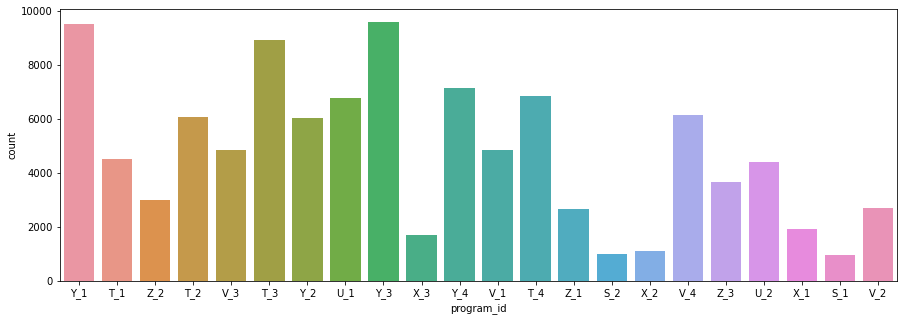

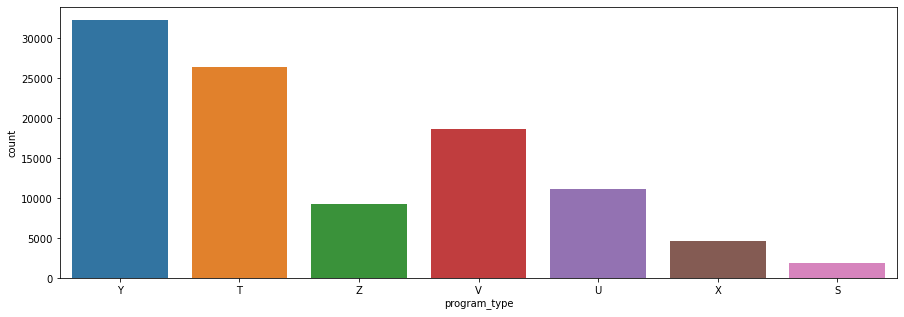

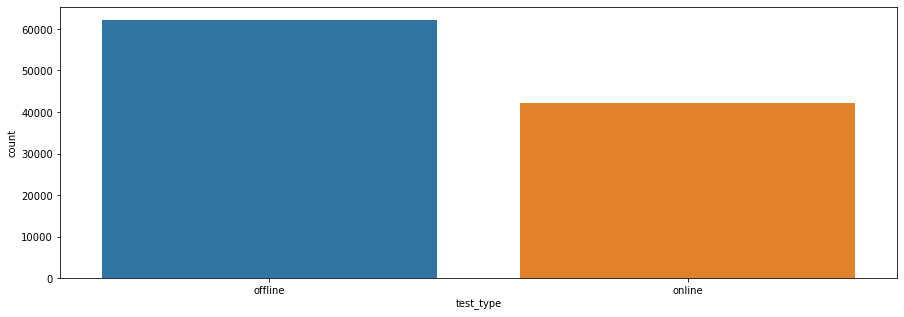

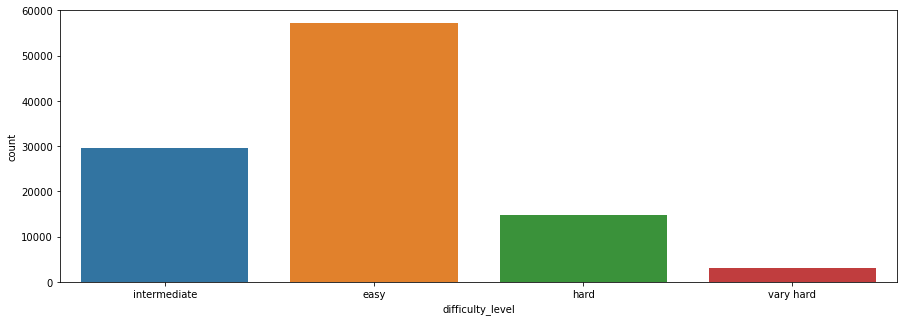

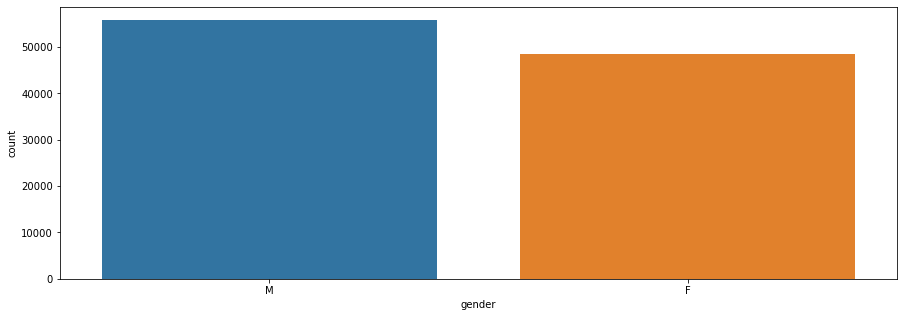

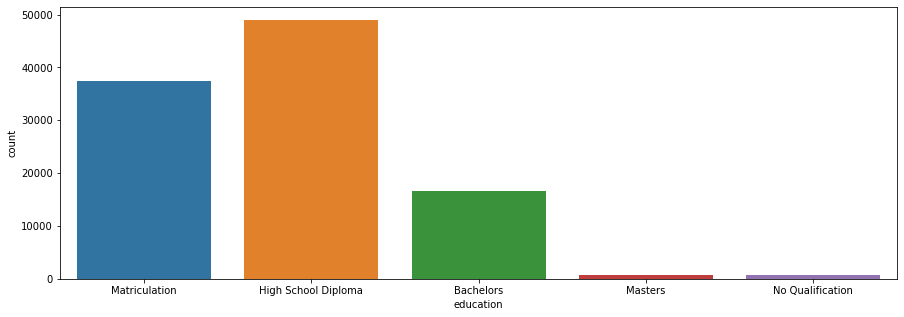

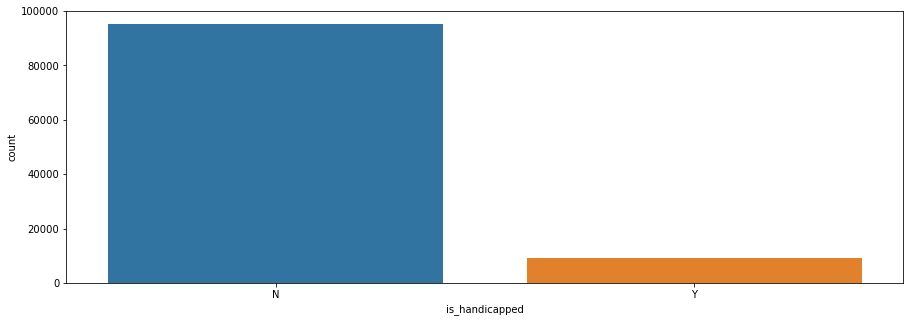

In [25]:
for col in cat_features.columns:
    plot_cat(col)

In [26]:
dummies=pd.get_dummies(all_data[['program_id', 'program_type', 'test_type', 'difficulty_level', 'gender',
       'education', 'is_handicapped']],drop_first=True)

In [27]:
all_nu_columns=all_data.select_dtypes(include=np.number).columns.tolist()
num=all_data[all_nu_columns]

In [28]:
all_data=pd.concat([dummies,num],axis=1)

In [29]:
train=all_data[ : 73147]
test= all_data[ 73147 : ]

In [30]:
train.shape

(73147, 43)

In [31]:
test.shape

(31349, 43)

In [32]:
X=train
y=train_data['is_pass']

In [33]:
from sklearn.linear_model import Lasso
from xgboost import XGBClassifier

In [34]:
classifier1=model = XGBClassifier()


In [35]:
classifier1.fit(X,y)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [36]:
y_pred1=classifier1.predict(test)


In [38]:
Id=test_data['id']
Id_df=pd.DataFrame(Id,columns=['id'])
y_pred_df=pd.DataFrame(y_pred1,columns=['is_pass'])
result1=pd.concat([Id,y_pred_df],axis=1)
result1.to_csv('sample_submission.csv',index=False)